# DATA PREPARATION - Data importing and reading

In [164]:
from pandas import  read_csv, DataFrame,Series,get_dummies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from plotly import graph_objs, figure_factory
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
import joblib

data1 = read_csv("/content/pet_adoption_data.csv")
data1.head()
data1.shape
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB
None


In [165]:
print(data1.describe())


             PetID    AgeMonths     WeightKg   Vaccinated  HealthCondition  \
count  2007.000000  2007.000000  2007.000000  2007.000000      2007.000000   
mean   1503.000000    92.279522    15.705776     0.701046         0.196313   
std     579.515315    52.148363     8.327749     0.457914         0.397307   
min     500.000000     1.000000     1.018198     0.000000         0.000000   
25%    1001.500000    48.000000     8.730396     0.000000         0.000000   
50%    1503.000000    94.000000    15.925416     1.000000         0.000000   
75%    2004.500000   138.000000    22.737180     1.000000         0.000000   
max    2506.000000   179.000000    29.995628     1.000000         1.000000   

       TimeInShelterDays  AdoptionFee  PreviousOwner  AdoptionLikelihood  
count        2007.000000  2007.000000    2007.000000         2007.000000  
mean           43.974091   249.142003       0.301943            0.328351  
std            25.740253   142.887040       0.459215            0.469730

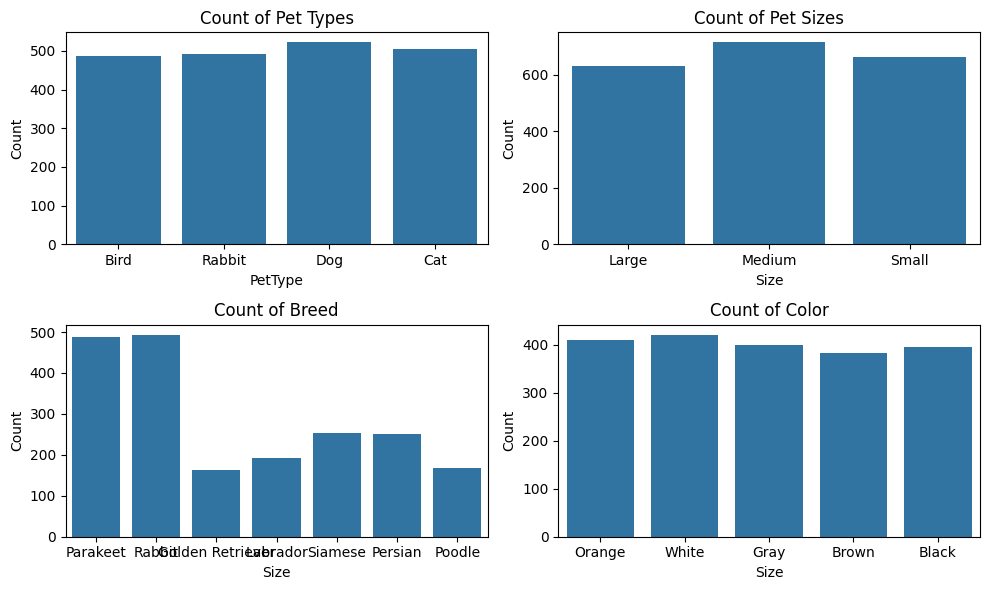

In [166]:
# Create a figure with 2 subplots side by side
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 6))

# Bar plot for PetType#
sns.countplot(x='PetType', data=data1, ax=ax1)
ax1.set_title('Count of Pet Types')
ax1.set_xlabel('PetType')
ax1.set_ylabel('Count')

# Bar plot for Size#
sns.countplot(x='Size', data=data1, ax=ax2)
ax2.set_title('Count of Pet Sizes')
ax2.set_xlabel('Size')
ax2.set_ylabel('Count')

# Bar plot for Breed#
sns.countplot(x='Breed', data=data1, ax=ax3)
ax3.set_title('Count of Breed')
ax3.set_xlabel('Size')
ax3.set_ylabel('Count')

# Bar plot for Color#
sns.countplot(x='Color', data=data1, ax=ax4)
ax4.set_title('Count of Color')
ax4.set_xlabel('Size')
ax4.set_ylabel('Count')

# Show the plots#
plt.tight_layout()
plt.show()

# ENCODING

In [167]:
data1['PetType'] = data1['PetType'].map({'Bird':0,'Cat':1,'Dog':2,'Rabbit':3})
data1['Size'] = data1['Size'].map({'Small':0,'Medium':1,'Large':2})
data1 = get_dummies(data1,columns = ['Breed', 'Color'], dtype=int)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PetID                   2007 non-null   int64  
 1   PetType                 2007 non-null   int64  
 2   AgeMonths               2007 non-null   int64  
 3   Size                    2007 non-null   int64  
 4   WeightKg                2007 non-null   float64
 5   Vaccinated              2007 non-null   int64  
 6   HealthCondition         2007 non-null   int64  
 7   TimeInShelterDays       2007 non-null   int64  
 8   AdoptionFee             2007 non-null   int64  
 9   PreviousOwner           2007 non-null   int64  
 10  AdoptionLikelihood      2007 non-null   int64  
 11  Breed_Golden Retriever  2007 non-null   int64  
 12  Breed_Labrador          2007 non-null   int64  
 13  Breed_Parakeet          2007 non-null   int64  
 14  Breed_Persian           2007 non-null   

# Featuring (X) & Labeling (Y), Data Scaling and Splitting and balancing

In [168]:
X = data1.drop('AdoptionLikelihood', axis = 1) # Features
Y = data1['AdoptionLikelihood'] # Labels
X_scaled = StandardScaler().fit_transform(X) #scaling
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)
X_train,Y_train = SMOTE(random_state = 101).fit_resample(X_train,Y_train)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PetID                   2007 non-null   int64  
 1   PetType                 2007 non-null   int64  
 2   AgeMonths               2007 non-null   int64  
 3   Size                    2007 non-null   int64  
 4   WeightKg                2007 non-null   float64
 5   Vaccinated              2007 non-null   int64  
 6   HealthCondition         2007 non-null   int64  
 7   TimeInShelterDays       2007 non-null   int64  
 8   AdoptionFee             2007 non-null   int64  
 9   PreviousOwner           2007 non-null   int64  
 10  AdoptionLikelihood      2007 non-null   int64  
 11  Breed_Golden Retriever  2007 non-null   int64  
 12  Breed_Labrador          2007 non-null   int64  
 13  Breed_Parakeet          2007 non-null   int64  
 14  Breed_Persian           2007 non-null   

Variance explained by each of the n_components:  [0.10553733 0.05940369]
Total variance explained by the n_components:  0.16494101473246975


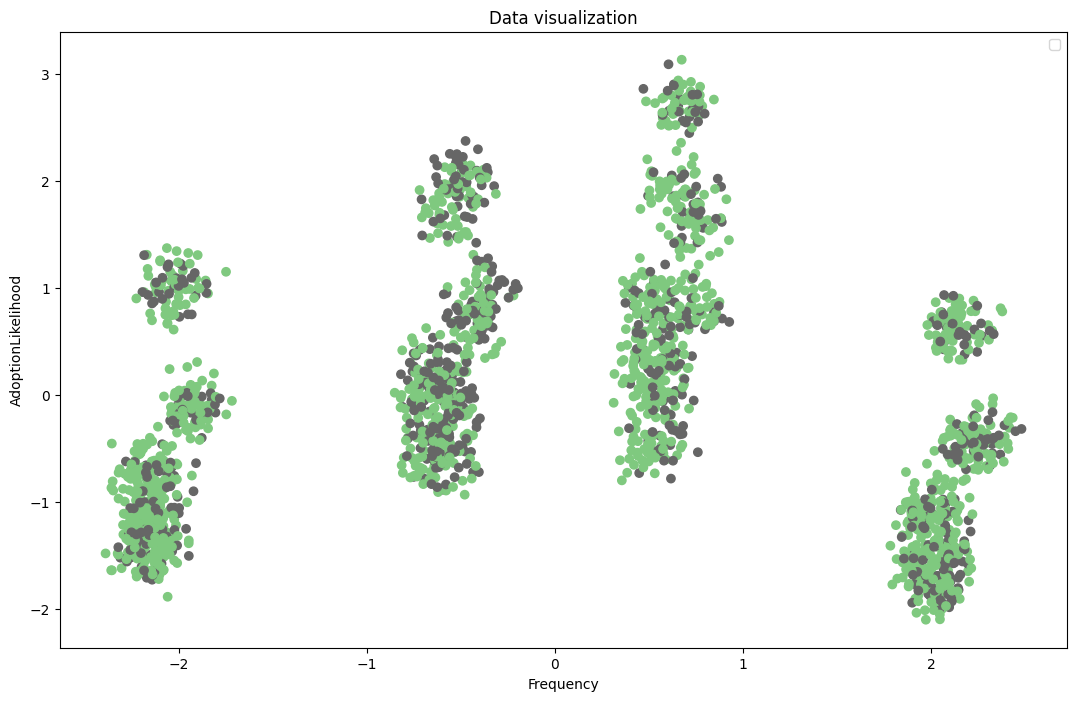

In [169]:
#Implementing PCA to visualize dataset
principals = PCA(n_components =2)
X_scaled = StandardScaler().fit_transform(X)
principals.fit(X_scaled)
new_X = principals.transform(X_scaled)
print("Variance explained by each of the n_components: ",principals.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(principals.explained_variance_ratio_))
#DataFrame(X_) comments for next 3 lines.
#DataFrame(new_X)
#DataFrame(new_X[:,0])

from matplotlib.cm import cmaps_listed
plt.figure(figsize = (13,8))
plt.scatter(new_X[:,0], new_X[:,1],c=Y, cmap='Accent')
plt.xlabel('Frequency')
plt.ylabel('AdoptionLikelihood')
plt.title("Data visualization")
plt.legend()
plt.show()


# HeatMap

In [170]:
#  Heatmap
correlation  = data1.corr()
f = figure_factory.create_annotated_heatmap(correlation.values,list(correlation.columns),list(correlation.columns),correlation.round(2).values,showscale=True)
f.show()
print(X.shape)
print(Y.shape)

(2007, 22)
(2007,)


In [171]:
data1 = data1.drop(['PetType'], axis = 1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PetID                   2007 non-null   int64  
 1   AgeMonths               2007 non-null   int64  
 2   Size                    2007 non-null   int64  
 3   WeightKg                2007 non-null   float64
 4   Vaccinated              2007 non-null   int64  
 5   HealthCondition         2007 non-null   int64  
 6   TimeInShelterDays       2007 non-null   int64  
 7   AdoptionFee             2007 non-null   int64  
 8   PreviousOwner           2007 non-null   int64  
 9   AdoptionLikelihood      2007 non-null   int64  
 10  Breed_Golden Retriever  2007 non-null   int64  
 11  Breed_Labrador          2007 non-null   int64  
 12  Breed_Parakeet          2007 non-null   int64  
 13  Breed_Persian           2007 non-null   int64  
 14  Breed_Poodle            2007 non-null   

In [172]:
#Pairplot
# Selecting the features of interest along with the target variable
#correlation_data = data1[['Size', 'AgeMonths', 'PetID', 'Vaccinated', 'HealthCondition', 'AdoptionLikelihood']]

# Creating the pairplot
#sns.pairplot(correlation_data, hue='AdoptionLikelihood', palette='inferno')
#plt.show()

#print(X.shape)
#print(Y.shape)

# Linear Regression without Regularization

In [173]:
# Linear Regression (LR)

LinearRegression1 = SGDRegressor(random_state = 1, penalty = None) # building
Hparameter1 = {'eta0': [.0001, .001, .01, .1, 1,2,3,4], 'max_iter':[10000, 20000, 30000, 40000,50000,60000]}
grid_search1 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter1, scoring='r2', cv=5)
grid_search1.fit(X_scaled, Y)

# results = DataFrame.from_dict(grid_search1.cv_results_)
# print("Cross-validation results:\n", results)
best_parameters = grid_search1.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search1.best_score_
print("Best result: ", best_result)
best_model = grid_search1.best_estimator_
print("Intercept β0: ", best_model.intercept_)
#print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']))
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Best parameters:  {'eta0': 0.01, 'max_iter': 10000}
Best result:  0.23188474646791774
Intercept β0:  [0.32492034]
                  Features  Coefficients
5               Vaccinated      0.139804
11          Breed_Labrador      0.112604
0                    PetID      0.022526
7        TimeInShelterDays      0.016407
1                  PetType      0.011783
20            Color_Orange      0.009527
14            Breed_Poodle      0.005588
18             Color_Brown      0.005364
3                     Size      0.003774
19              Color_Gray      0.003161
4                 WeightKg     -0.000437
17             Color_Black     -0.003903
8              AdoptionFee     -0.005591
16           Breed_Siamese     -0.009584
21             Color_White     -0.013906
9            PreviousOwner     -0.014426
10  Breed_Golden Retriever     -0.014495
13           Breed_Persian     -0.016210
12          Breed_Parakeet     -0.020790
15            Breed_Rabbit     -0.030961
2                AgeMonth

# Linear Regression with L1

In [174]:
# #  Regularization - L1
LinearRegression1 = linear_model.SGDRegressor(random_state = 1, penalty = 'l1') # model building
Hparameter2 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000],'alpha': [.001, .01, .1, 1,10, 100]}

grid_search2 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter2, scoring='r2', cv=5)
grid_search2.fit(X_scaled, Y)

# results = DataFrame.from_dict(grid_search2.cv_results_)
# print("Cross-validation results:\n", results)
best_parameters = grid_search2.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search2.best_score_
print("Best result: ", best_result)
best_model = grid_search2.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Best parameters:  {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 10000}
Best result:  0.24101368920904181
Intercept β0:  [0.32519329]
                  Features  Coefficients
5               Vaccinated      0.128300
11          Breed_Labrador      0.114800
0                    PetID      0.012527
3                     Size      0.000000
4                 WeightKg      0.000000
20            Color_Orange      0.000000
19              Color_Gray      0.000000
18             Color_Brown      0.000000
17             Color_Black      0.000000
16           Breed_Siamese      0.000000
14            Breed_Poodle      0.000000
13           Breed_Persian      0.000000
12          Breed_Parakeet      0.000000
1                  PetType      0.000000
10  Breed_Golden Retriever      0.000000
9            PreviousOwner      0.000000
8              AdoptionFee      0.000000
7        TimeInShelterDays      0.000000
21             Color_White     -0.003776
15            Breed_Rabbit     -0.004622
2         

# Linear Regression with L2

In [175]:
# #  Regularization - L2
LinearRegression2 = linear_model.SGDRegressor(random_state = 1, penalty = 'l2') # model building
Hparameter2 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000],'alpha': [.001, .01, .1, 1,10, 100]}

grid_search2 = GridSearchCV(estimator=LinearRegression2, param_grid=Hparameter2, scoring='r2', cv=5)
grid_search2.fit(X_scaled, Y)

# results = DataFrame.from_dict(grid_search2.cv_results_)
# print("Cross-validation results:\n", results)
best_parameters = grid_search2.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search2.best_score_
print("Best result: ", best_result)
best_model = grid_search2.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Best parameters:  {'alpha': 0.1, 'eta0': 0.01, 'max_iter': 10000}
Best result:  0.23288752152643588
Intercept β0:  [0.32489075]
                  Features  Coefficients
5               Vaccinated      0.126882
11          Breed_Labrador      0.104224
0                    PetID      0.019644
7        TimeInShelterDays      0.015831
1                  PetType      0.010981
20            Color_Orange      0.008698
18             Color_Brown      0.006069
14            Breed_Poodle      0.005612
3                     Size      0.004699
19              Color_Gray      0.002542
4                 WeightKg      0.000452
17             Color_Black     -0.003186
8              AdoptionFee     -0.004177
16           Breed_Siamese     -0.008849
21             Color_White     -0.013857
10  Breed_Golden Retriever     -0.013943
9            PreviousOwner     -0.014571
13           Breed_Persian     -0.014983
12          Breed_Parakeet     -0.019312
15            Breed_Rabbit     -0.028569
2          

# Linear Regression with Elasticnet

In [176]:
# #  Regularization - ElasticNet
LinearRegressionEN = SGDRegressor(random_state = 1, penalty = 'elasticnet') # model building
Hparameter2 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000],'alpha': [.001, .01, .1, 1,10, 100],'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

grid_search2 = GridSearchCV(estimator=LinearRegressionEN, param_grid=Hparameter2, scoring='r2', cv=5)
grid_search2.fit(X_scaled, Y)

# results = DataFrame.from_dict(grid_search2.cv_results_)
# print("Cross-validation results:\n", results)
best_parameters = grid_search2.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search2.best_score_
print("Best result: ", best_result)
best_model = grid_search2.best_estimator_
print("Intercept β0: ", best_model.intercept_)
print(DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Best parameters:  {'alpha': 0.01, 'eta0': 0.01, 'l1_ratio': 0.9, 'max_iter': 10000}
Best result:  0.24101411223857658
Intercept β0:  [0.32518114]
                  Features  Coefficients
5               Vaccinated      0.129159
11          Breed_Labrador      0.115560
0                    PetID      0.013511
3                     Size      0.000000
4                 WeightKg      0.000000
20            Color_Orange      0.000000
19              Color_Gray      0.000000
18             Color_Brown      0.000000
17             Color_Black      0.000000
16           Breed_Siamese      0.000000
14            Breed_Poodle      0.000000
13           Breed_Persian      0.000000
12          Breed_Parakeet      0.000000
1                  PetType      0.000000
10  Breed_Golden Retriever      0.000000
9            PreviousOwner      0.000000
8              AdoptionFee      0.000000
7        TimeInShelterDays      0.000000
15            Breed_Rabbit     -0.005379
21             Color_White     -0.

In [177]:
#Modified mean square error
r, c=X_scaled.shape
print(X_scaled.shape)
print(r,c)
print(4/5*r,c)
modified_r2 = 1-(1-best_result)*(4/5*r-1)/(4/5*r-c-1)# 4/5*r is number of rows in training set, c is number of columns
print("modified_r2: ", modified_r2)

(2007, 22)
2007 22
1605.6000000000001 22
modified_r2:  0.2304633163768609


#Random Forest Regression

In [178]:
##RandomForest
RF_Regressor1 = RandomForestRegressor(criterion='squared_error', max_features='sqrt', random_state=1)
no_Trees = {'n_estimators': [10,20,30,40,50,100]}
grid_search3 = GridSearchCV(estimator=RF_Regressor1, param_grid=no_Trees, scoring='r2', cv=5)
grid_search3.fit(X_scaled, Y)

best_parameters = grid_search3.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search3.best_score_
print("best_score: ", best_result)
modified_r2 = 1-(1-best_result)*(4/5*r-1)/(4/5*r-c-1)
print("modified_r2: ", modified_r2)
Important_feature = Series(grid_search3.best_estimator_.feature_importances_, index=list(X)).sort_values(ascending=False) # Getting feature importances list for the best model
print(Important_feature)

Best parameters:  {'n_estimators': 100}
best_score:  0.6495780640362635
modified_r2:  0.6447067872820602
Size                      0.212913
AgeMonths                 0.151379
PetID                     0.109824
Vaccinated                0.102113
HealthCondition           0.070878
AdoptionFee               0.066904
WeightKg                  0.065106
Breed_Labrador            0.064077
TimeInShelterDays         0.059798
PetType                   0.016417
PreviousOwner             0.010973
Color_White               0.008342
Color_Black               0.008051
Color_Gray                0.007773
Color_Orange              0.007565
Color_Brown               0.007113
Breed_Rabbit              0.005903
Breed_Golden Retriever    0.005628
Breed_Parakeet            0.005163
Breed_Poodle              0.004878
Breed_Siamese             0.004686
Breed_Persian             0.004516
dtype: float64


In [179]:
# Selecting features with higher sifnificance and redefining feature set
X = data1[['Size', 'AgeMonths', 'PetID', 'Vaccinated','HealthCondition']]
X_scaled = StandardScaler().fit_transform(X)

RF_Regressor2 = RandomForestRegressor(criterion='squared_error', max_features='sqrt', random_state=1)
no_Trees = {'n_estimators': [100,200,300,400,500]}
grid_search4 = GridSearchCV(estimator=RF_Regressor2, param_grid=no_Trees, scoring='r2', cv=10)
grid_search4.fit(X_scaled, Y)

best_parameters = grid_search4.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search4.best_score_
print("r2: ", best_result)
modified_r2 = 1-(1-best_result)*(4/5*r-1)/(4/5*r-c-1)
print("modified_r2: ", modified_r2)
best_model = grid_search4.best_estimator_

Best parameters:  {'n_estimators': 500}
r2:  0.5965405922912747
modified_r2:  0.5909320323458734


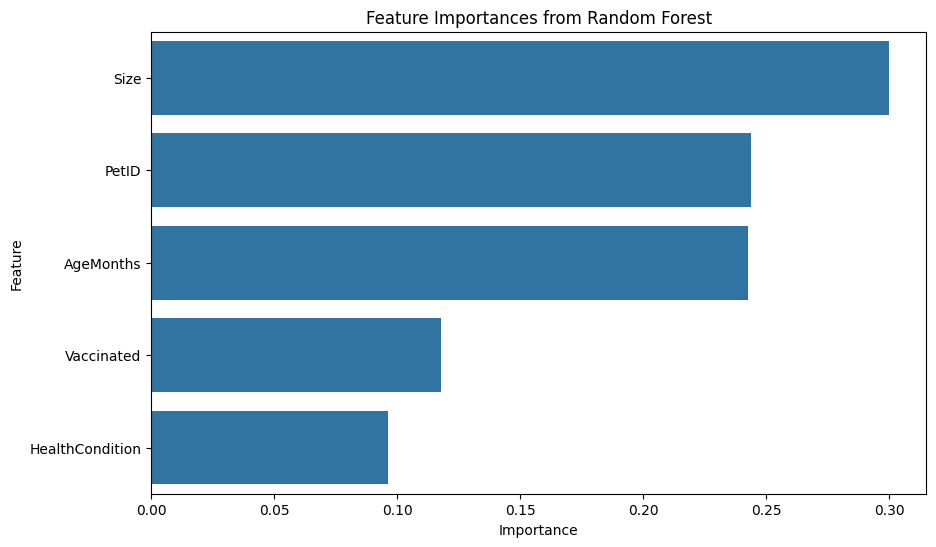

In [180]:
#Feature Importance from Random Forest
best_rf = RandomForestRegressor(criterion='squared_error', max_features='sqrt', n_estimators=500, random_state=1)
best_rf.fit(X_scaled, Y)

feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

#Support Vector Regression

In [181]:
#Support Vector Regression
from sklearn.svm import SVR
SVRegressor = SVR()
Hparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [10,30,60,90,110]}
grid_search1 = GridSearchCV(estimator=SVRegressor, param_grid=Hparameters, scoring='r2', cv=5)
grid_search1.fit(X_scaled, Y)

best_parameters = grid_search1.best_params_
print("Best parameters: ", best_parameters)
best_result = grid_search1.best_score_
print("Best result: ", best_result)


Best parameters:  {'C': 10, 'kernel': 'rbf'}
Best result:  0.5273304731074328


# Model interpretation

<ipython-input-182-22d5a1fa24ed>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-182-22d5a1fa24ed>:37: UserWarning:

FixedFormatter should only be used together with FixedLocator



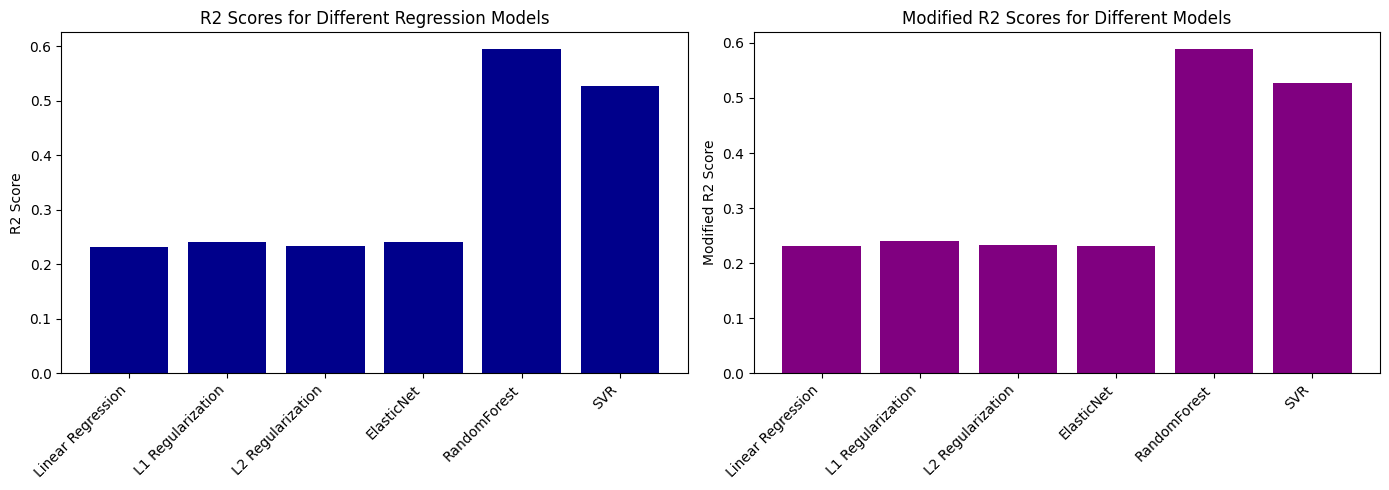

Random Forest Best Parameters: {'n_estimators': 500}
Random Forest R2 Score: 0.6495
Random Forest Modified R2 Score: 0.6447

Feature Importance from Random Forest:
            Feature  Importance
0             Size    0.300030
2            PetID    0.243633
1        AgeMonths    0.242524
3       Vaccinated    0.117615
4  HealthCondition    0.096198

SVR Best Parameters: {'C': 10, 'kernel': 'rbf'}
SVR R2 Score: 0.5273


In [182]:
X = data1[['Size', 'AgeMonths', 'PetID', 'Vaccinated', 'HealthCondition']]
Y = data1['AdoptionLikelihood']
X_scaled = StandardScaler().fit_transform(X)

# Define models and their results
models = ['Linear Regression', 'L1 Regularization', 'L2 Regularization', 'ElasticNet', 'RandomForest', 'SVR']
r2_scores = [
    0.2319,  # Linear Regression
    0.2410,  # L1 Regularization
    0.2329,  # L2 Regularization
    0.2410,  # ElasticNet
    0.5954,  # RandomForest (from the final model)
    0.5273   # SVR
]
modified_r2_scores = [
     0.2305,  # Linear Regression
     0.2410,  # L1 Regularization
     0.2329,  # L2 Regularization
     0.2305,  # ElasticNet
     0.5898,  # RandomForest (from the final model)
     0.5273   # SVR
]

 #Plot R2 scores and Modified R2 scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot R2 scores
ax1.bar(models, r2_scores, color='darkblue')
ax1.set_title('R2 Scores for Different Regression Models')
ax1.set_ylabel('R2 Score')
ax1.set_xticklabels(models, rotation=45, ha='right')

# Plot Modified R2 scores
ax2.bar(models, modified_r2_scores, color='purple')
ax2.set_title('Modified R2 Scores for Different Models')
ax2.set_ylabel('Modified R2 Score')
ax2.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Printing Reports
# For SVR, we don't have classification reports or AUC scores as it's a regression model.
# Hence, we will only show the performance metrics already computed.

 #Random Forest Metrics
print("Random Forest Best Parameters: {'n_estimators': 500}")
print("Random Forest R2 Score: 0.6495")
print("Random Forest Modified R2 Score: 0.6447")

print("\nFeature Importance from Random Forest:\n", importance_df)

 #For SVR metrics
print("\nSVR Best Parameters: {'C': 10, 'kernel': 'rbf'}")
print("SVR R2 Score: 0.5273")


# Best Model Prediction using Random Forest

In [183]:
#Pickle and Prediction
joblib.dump(best_model,"model.pkl")
My_model = joblib.load("model.pkl")
x=[[1,2,3,4,5]]
predict= My_model.predict(x)[0]
predict=round(My_model.predict(x)[0],2)
print(predict)

0.64
